In [1]:
sys.path.insert(0, './common')

import sys
import wave
import ppo_unite

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [3]:
env = wave.WaveEnv(env_path, worker_id=69)

WAVE environment created.


In [3]:
# BEST PPO 
# hidden_layer = 1024
# ppo_epochs = 5
# clip = 0.2
# minibatch_size=128

hidden_layer = 512
ppo_epochs = 10
clip = 0.2
minibatch_size = 128
model = ppo_unite.PPO(127, 2, hidden_layer, minibatch_size=minibatch_size, ppo_epochs=ppo_epochs, clip=clip, lr=1e-4)

In [4]:
save_path = f'./results/env01/ppo/512-128-ppounite-normalize-complexlayers'
model.set_model_save_path(save_path)

In [5]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


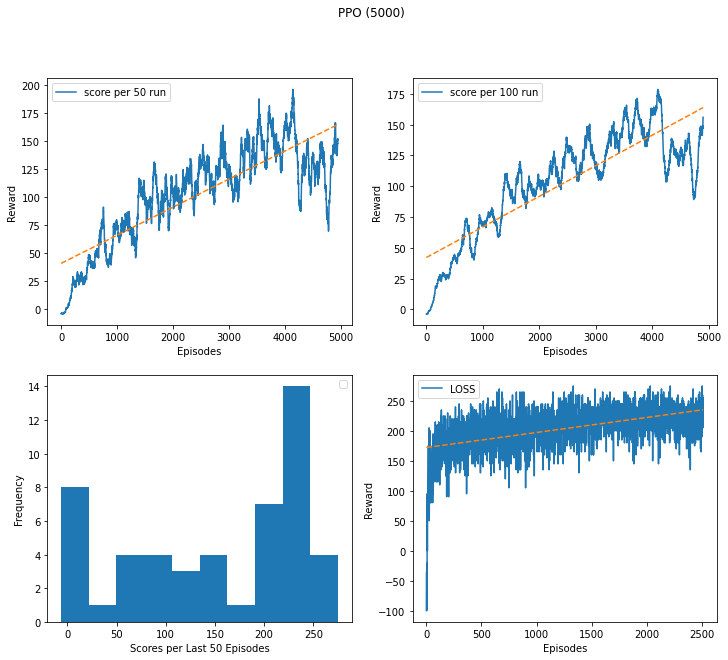

Model saved
Training history saved
saved to ./results/env01/ppo/512-128-ppounite-normalize-complexlayers
epoch: 4999, total timestep: 2514628, total reward: 224.9999703913927, timestep: 1000, lr: 3.4867844010000016e-05


In [7]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 5000, show_plot=True)

In [7]:
model.save_model()

Model saved
Training history saved


In [ ]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

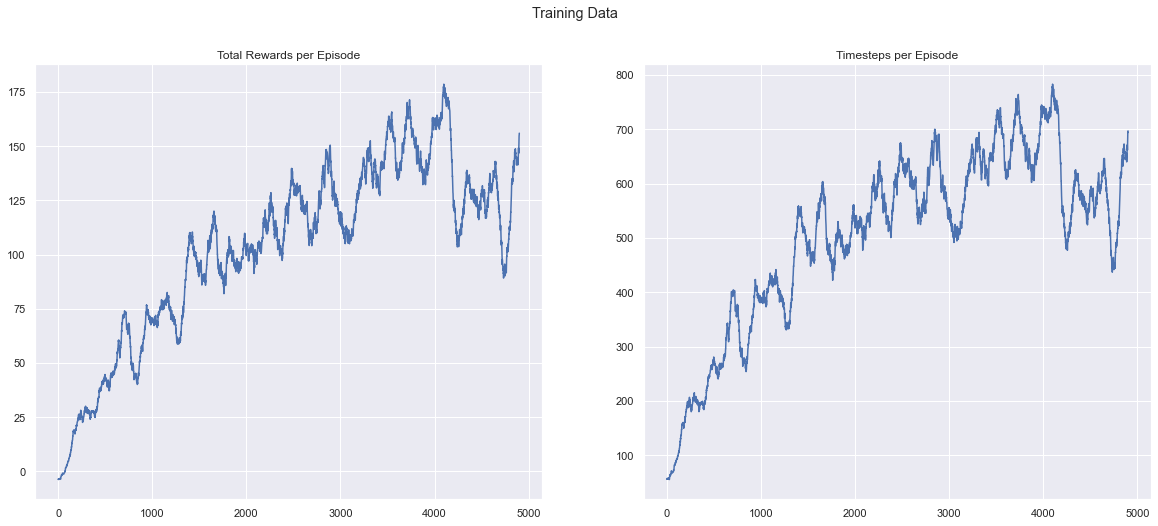

In [6]:
model.plot_train_memory(smooth=100)

In [8]:
env = wave.WaveEnv(env_path, 2, worker_id=1)
model.test(env)

WAVE environment created.


(300.309961527586, 1394)

In [8]:
env = wave.WaveEnv(env_path, 20, worker_id=33)
model.test_avg(env, 100)

WAVE environment created.
251.0599673986435 1079
218.4799730926752 1231
591.859921514988 2663
-8.71000000834465 75
825.3798856586218 3493
540.6099353432655 2588
-8.080000028014183 62
1630.07978194952 7099
268.4799659103155 1231
-11.219999611377716 125
131.7299815863371 666
45.049992084503174 399
260.31996081769466 1294
28.679994761943817 327
317.1499573737383 1457
151.1299766600132 778
1157.52985227108 4850
531.8799263685942 2363
611.8299234211445 2964
580.6299285292625 2588
238.47996945679188 1231
530.6299218833447 2588
-9.969999685883522 100
0.03999967873096466 100
889.0498784482479 3719
1103.2798555791378 4635
3194.699589371681 12906
191.05997115373611 1079
583.0799314528704 2739
-7.600000038743019 52
5.1799992471933365 97
84.95998790860176 401
1042.4998732060194 4850
39.94999419152737 401
2388.579690232873 10429
829.1398891061544 3518
834.0498967915773 3719
2132.6397171616554 9148
66.20999014377594 476
2186.159717813134 9677
615.6999212354422 2586
77.43999095261097 552
-7.600000038

([251.0599673986435,
  218.4799730926752,
  591.859921514988,
  -8.71000000834465,
  825.3798856586218,
  540.6099353432655,
  -8.080000028014183,
  1630.07978194952,
  268.4799659103155,
  -11.219999611377716,
  131.7299815863371,
  45.049992084503174,
  260.31996081769466,
  28.679994761943817,
  317.1499573737383,
  151.1299766600132,
  1157.52985227108,
  531.8799263685942,
  611.8299234211445,
  580.6299285292625,
  238.47996945679188,
  530.6299218833447,
  -9.969999685883522,
  0.03999967873096466,
  889.0498784482479,
  1103.2798555791378,
  3194.699589371681,
  191.05997115373611,
  583.0799314528704,
  -7.600000038743019,
  5.1799992471933365,
  84.95998790860176,
  1042.4998732060194,
  39.94999419152737,
  2388.579690232873,
  829.1398891061544,
  834.0498967915773,
  2132.6397171616554,
  66.20999014377594,
  2186.159717813134,
  615.6999212354422,
  77.43999095261097,
  -7.600000038743019,
  16.409996524453163,
  2572.159670814872,
  -7.489999815821648,
  820.399896129965

In [7]:
# 432.7257438251376, 1901.86
env.close()